In [90]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = data('tips')
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [29]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
tip = df.tip

In [ ]:
sex = df.sex

In [17]:
smoker = df.smoker

In [18]:
day = df.day

In [19]:
time = df.time

In [101]:
size = df.size
size

2196

In [ ]:
## Question 1
        
a) What is the highest bill?
    
b) What time of day did this bill occur? 

In [21]:
total_bill = df.total_bill
total_bill.max()
#The highest bill is $50.81.

50.81

In [24]:
df.sort_values(by='total_bill', ascending=False)
#The highest bill occurred during dinner time.

,total_bill,tip,sex,smoker,day,time,size
171,50.81,10.00,Male,Yes,Sat,Dinner,3
213,48.33,9.00,Male,No,Sat,Dinner,4
60,48.27,6.73,Male,No,Sat,Dinner,4
157,48.17,5.00,Male,No,Sun,Dinner,6
183,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
150,7.51,2.00,Male,No,Thur,Lunch,2
112,7.25,1.00,Female,No,Sat,Dinner,1
173,7.25,5.15,Male,Yes,Sun,Dinner,2
93,5.75,1.00,Female,Yes,Fri,Dinner,2


In [ ]:
## Question 2
    
a) What values are in the smoker column?
    
b) Are the majority of tables smoking or non-smoking?

In [27]:
smoker.dtype
#Object is the data type in the smoker column.

dtype('O')

In [28]:
smoker.describe()
#The majority of tables are non-smoking

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [ ]:
## Question 3 
    
- What proportion of the bills are from the weekend (Saturday and/or Sunday)?
- Round your answer to two decimal points.

In [26]:
day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [30]:
def is_weekend(d):
    return d in ['Sun', 'Sat']

In [50]:
mask_wknd = day.apply(is_weekend)
mask_wknd
mask_wknd.describe()
freq = 163
count = 244

prop_1 = freq/count*100
round(prop_1, 2)

66.8

In [ ]:
## Question 4

- Create a column named `percent_tip`.
- Calculate the percent_tip based on the formula below. 
> $\texttt{Percent tip} = \dfrac{\texttt{tip amount}}{\texttt{bill}}$
- What was the highest percent tip?

In [52]:
percent_tip = tip/total_bill
percent_tip

1      0.059447
2      0.160542
3      0.166587
4      0.139780
5      0.146808
         ...   
240    0.203927
241    0.073584
242    0.088222
243    0.098204
244    0.159744
Length: 244, dtype: float64

In [56]:
df['percent_tip'] = round(tip/total_bill*100)
df[['total_bill', 'tip', 'percent_tip']].head()

,total_bill,tip,percent_tip
1,16.99,1.01,6.0
2,10.34,1.66,16.0
3,21.01,3.50,17.0
4,23.68,3.31,14.0
5,24.59,3.61,15.0


In [59]:
percent_tip = df.percent_tip
percent_tip.max()

71.0

In [ ]:
## Question 5

    
a) Which time of day has a higher average bill, dinner or lunch?
    
b) What is the difference in the average bill?


In [70]:
df['avg_bill'] = total_bill/244

In [63]:
df.groupby('time')['avg_bill'].mean()

time
Dinner    19.785943
Lunch     19.785943
Name: avg_bill, dtype: float64

In [ ]:
- Rename the column named `size` to `table size`
- Verify this column name replaces the former column name 
- Use your new column name to determine:
    - What is the most common table size?


In [97]:
df.rename(columns={'size': 'table_size'})

,total_bill,tip,sex,smoker,day,time,table_size,percent_tip,avg_bill
1,16.99,1.01,Female,No,Sun,Dinner,2,6.0,0.069631
2,10.34,1.66,Male,No,Sun,Dinner,3,16.0,0.042377
3,21.01,3.50,Male,No,Sun,Dinner,3,17.0,0.086107
4,23.68,3.31,Male,No,Sun,Dinner,2,14.0,0.097049
5,24.59,3.61,Female,No,Sun,Dinner,4,15.0,0.100779
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,20.0,0.118975
241,27.18,2.00,Female,Yes,Sat,Dinner,2,7.0,0.111393
242,22.67,2.00,Male,Yes,Sat,Dinner,2,9.0,0.092910
243,17.82,1.75,Male,No,Sat,Dinner,2,10.0,0.073033


In [104]:
table_size = df['size']
table_size

1      2
2      3
3      3
4      2
5      4
      ..
240    3
241    2
242    2
243    2
244    2
Name: size, Length: 244, dtype: int64

In [107]:
table_size.describe()
#The most common table size is for 2

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [ ]:
## Question 8


- What is the min, mean, and max total bill?
- Plot the distribution of the total bill
    - add a title
    

In [116]:
x = max = total_bill.max()

In [117]:
y = min = total_bill.min()

In [111]:
total_bill.mean()

19.785942622950824

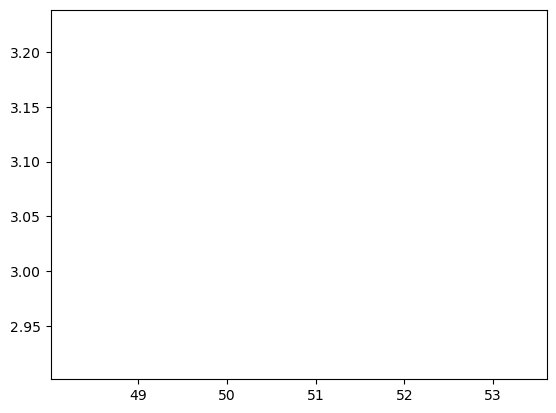

In [118]:
plt.plot(x, y)
plt.show()